In [24]:
# Importing the necessary libraries for data analysis, visualization, and machine learning model building.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Scikit-learn modules essential for preparing the data and training a Linear Regression model.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Importing evaluation metrics (MSE and R-squared) to assess the performance and accuracy of the trained model.
from sklearn.metrics import mean_squared_error, r2_score

# Importing a utility module to handle and suppress potential warnings during script execution.
import warnings

In [25]:
# Loading the dataset from a CSV file into a pandas DataFrame named 'df'.
# This is the initial and crucial step for importing data into the project environment for analysis.
df = pd.read_csv('insurance.csv')

# Displaying the first few rows (or the entire DataFrame if it's small) to quickly inspect the data structure,
# column names, and the general format of the values.
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [26]:
# Displaying a summary of the DataFrame to quickly check data types, non-null values count, and memory usage.
# This step is critical for initial **Data Quality Assessment** and identifying columns that may require cleaning or type conversion.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [27]:
# Generating descriptive statistics for the numerical columns in the DataFrame.
# This provides key metrics like count, mean, standard deviation, minimum, maximum, and quartiles (25th, 50th, 75th percentiles).
# This is a crucial step in EDA for understanding the **central tendency, dispersion, and shape of the data's distribution**.
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


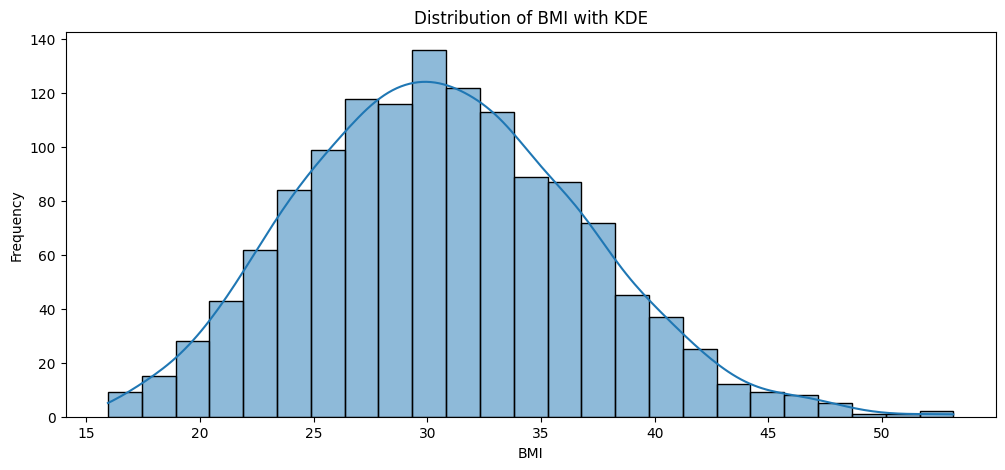

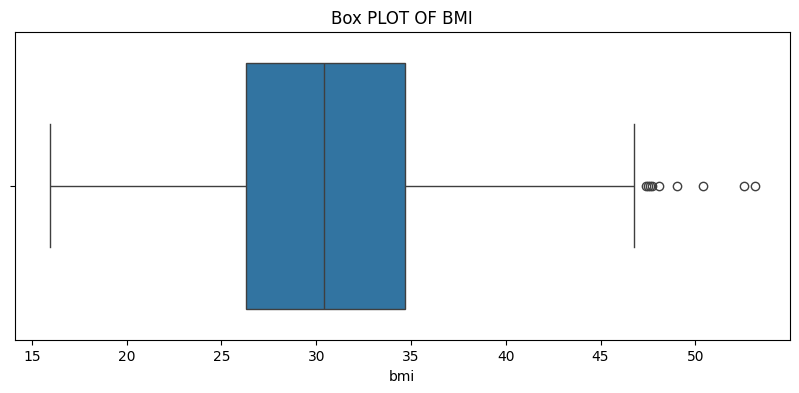

In [28]:
# --- Visual Exploratory Data Analysis (EDA) on the 'bmi' feature ---

# Setting up the figure size and creating a histogram combined with a Kernel Density Estimate (KDE).
# This plot is used to analyze the **distribution shape, central tendency, and spread** of the BMI values.
plt.figure(figsize=(12,5))
sns.histplot(df['bmi'],kde=True)
plt.title('Distribution of BMI with KDE')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# Creating a box plot for the 'bmi' feature on a separate figure.
# The box plot helps to **identify potential outliers** and visualize the five-number summary (median, quartiles, min/max).
plt.figure(figsize=(10,4))
sns.boxplot(x=df['bmi'])
plt.title('Box PLOT OF BMI')
plt.show()

In [29]:
# Calculating the 25th percentile (Q1) and 75th percentile (Q3) of the 'bmi' column.
# These quartiles are essential for defining the spread of the central 50% of the data.
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)

# Calculating the Interquartile Range (IQR), which is the difference between Q3 and Q1.
# The IQR is the basis for establishing the boundaries for outlier detection.
IQR = Q3 - Q1

# Calculating the lower and upper bounds using the 1.5 * IQR rule.
# Data points outside this range (lowwer_bound, upper_bound) are flagged as potential outliers.
lowwer_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Printing the calculated boundaries to inspect the range for normal 'bmi' values.
print(f"Lower: {lowwer_bound}', Upper: {upper_bound} ")

Lower: 13.7', Upper: 47.290000000000006 


In [30]:
# Removing duplicate rows from the DataFrame in place.
# This operation ensures that each observation (row) in the dataset is unique,
# which is essential for accurate model training and avoiding bias or overfitting
# due to repeated data points.
df.drop_duplicates(inplace=True)

In [31]:
# Filtering the original DataFrame 'df' to create a new DataFrame 'df_cleaned'.
# This step keeps only the rows where the 'bmi' value falls within the calculated lower and upper bounds,
# effectively **removing the identified BMI outliers** (based on the 1.5 * IQR rule).
df_cleaned = df[(df['bmi'] >= lowwer_bound) & (df['bmi'] <= upper_bound)]

In [32]:
df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


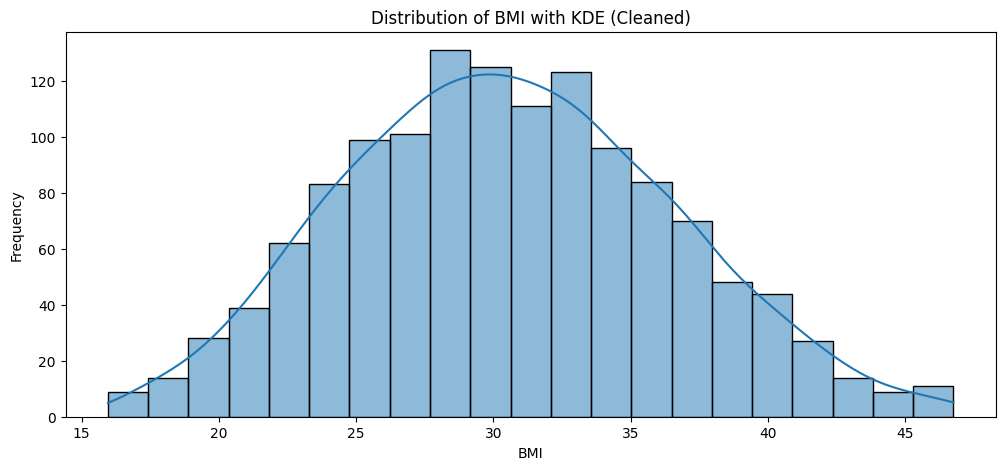

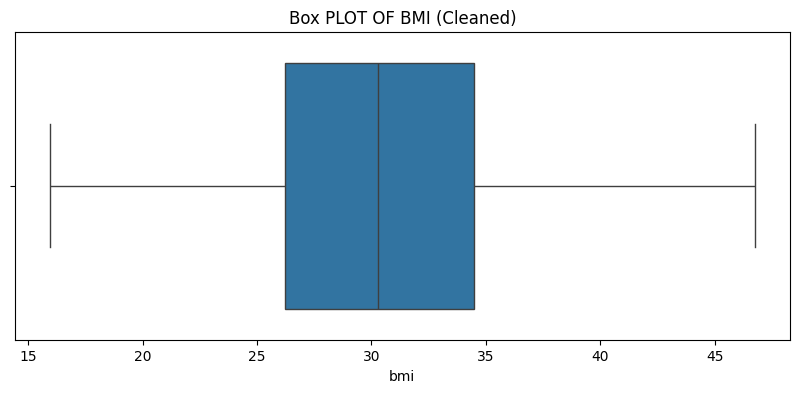

In [33]:
# --- Visualization of BMI after Outlier Removal ---

# Setting up the figure size and creating a histogram with KDE for the **cleaned** 'bmi' feature ('df_cleaned').
# This plot is used to re-assess the **distribution** of BMI, which should now be tighter and less skewed due to outlier removal.
plt.figure(figsize=(12,5))
sns.histplot(df_cleaned['bmi'],kde=True)
plt.title('Distribution of BMI with KDE (Cleaned)')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# Creating a box plot for the **cleaned** 'bmi' feature.
# This visualization confirms the **successful removal of outliers**, as the box plot should now show no points beyond the whiskers.
plt.figure(figsize=(10,4))
sns.boxplot(x=df_cleaned['bmi'])
plt.title('Box PLOT OF BMI (Cleaned)')
plt.show()

In [34]:
# --- Feature Engineering: One-Hot Encoding ---

# Applying one-hot encoding to all categorical features in the DataFrame 'df_cleaned'.
# pd.get_dummies converts categorical variables into dummy/indicator variables (0s and 1s).
df_cleaned = pd.get_dummies(df_cleaned, drop_first=True)

# The 'drop_first=True' argument is used to avoid the **multicollinearity trap**.
# By dropping the first category in each new dummy variable group, only N-1 columns are kept,
# which is sufficient to represent all N categories and ensures the model can be properly trained.
df_cleaned

# Displaying the resulting DataFrame to inspect the newly created dummy variables
# and confirm the categorical columns have been successfully converted to numerical format.

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [35]:
df_cleaned.corr()# Calculating the **Pearson correlation coefficient** for all pairs of columns in the cleaned DataFrame 'df_cleaned'.
# Correlation measures the linear relationship between two variables, ranging from -1 (perfect inverse correlation) to +1 (perfect positive correlation).
df_cleaned.corr()

# The resulting correlation matrix is essential for:
# 1. Understanding the relationship between the **target variable (likely 'charges') and the features**.
# 2. **Identifying multicollinearity** (high correlation between independent features), which can negatively impact model stability.

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.114785,0.042103,0.301317,-0.018089,-0.025075,0.001624,-0.012249,0.009868
bmi,0.114785,1.000000,0.017366,0.193270,0.039966,-0.002868,-0.128760,0.255903,0.000655
children,0.042103,0.017366,1.000000,0.069125,0.019973,0.007234,0.025449,-0.019239,0.019641
charges,0.301317,0.193270,0.069125,1.000000,0.064161,0.785896,-0.036482,0.071191,-0.046341
sex_male,-0.018089,0.039966,0.019973,0.064161,1.000000,0.080269,-0.011291,0.010721,-0.000771
smoker_yes,-0.025075,-0.002868,0.007234,0.785896,0.080269,1.000000,-0.035315,0.068055,-0.039665
region_northwest,0.001624,-0.128760,0.025449,-0.036482,-0.011291,-0.035315,1.000000,-0.344453,-0.322709
region_southeast,-0.012249,0.255903,-0.019239,0.071191,0.010721,0.068055,-0.344453,1.000000,-0.344453
region_southwest,0.009868,0.000655,0.019641,-0.046341,-0.000771,-0.039665,-0.322709,-0.344453,1.000000


<Axes: >

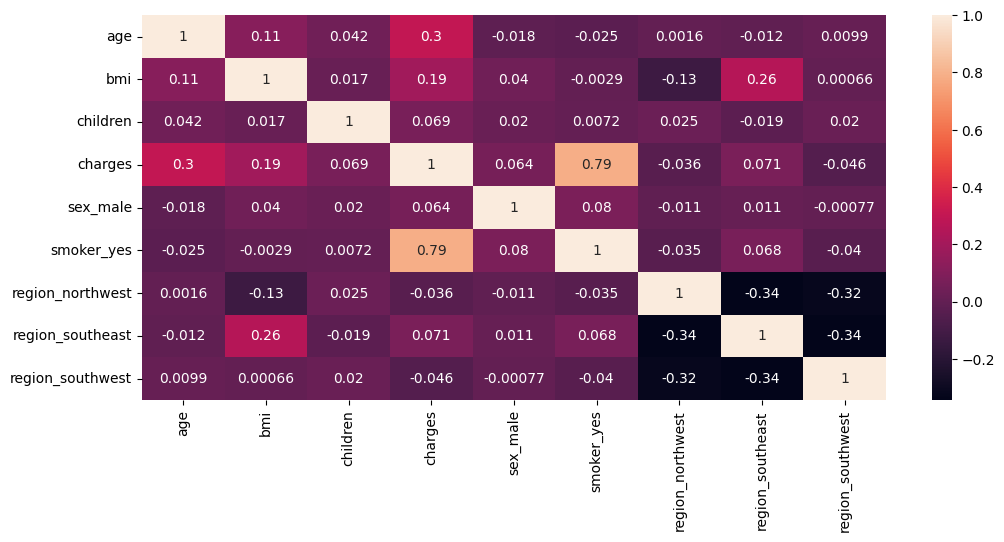

In [36]:
# --- Visualization of Feature Correlation ---

# Setting the size of the plot for better readability.
plt.figure(figsize=(12,5))

# Creating a **heatmap** of the correlation matrix calculated in the previous step (df_cleaned.corr()).
# A heatmap is an excellent tool for visually assessing the strength and direction of linear relationships:
# - Colors indicate the correlation value (e.g., darker/lighter shades for higher/lower correlation).
# - 'annot=True' displays the numerical correlation values on top of the heatmap cells.
sns.heatmap(df_cleaned.corr(), annot=True)

In [37]:
# Retrieving and displaying the names of all columns (features) in the final cleaned and encoded DataFrame.
# This step is crucial for verifying the success of the one-hot encoding (dummy variables will be present)
# and for correctly selecting the features (X) and the target variable (y) in the next steps of model preparation.
df_cleaned.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [38]:
# --- Model Preparation: Feature and Target Separation ---

# Defining the **feature matrix (X)**. These are the independent variables that the model will use to make predictions.
# The selected features ('age', 'bmi', 'children', 'sex_male', 'smoker_yes') are chosen based on the correlation analysis
# (or domain knowledge) to predict insurance charges.
x = df_cleaned[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]

# Defining the **target vector (y)**. This is the dependent variable that the model is trying to predict,
# which is the insurance cost ('charges') in this project.
y = df_cleaned['charges']

In [39]:
# --- Model Preparation: Data Splitting ---

# Splitting the feature matrix (x) and the target vector (y) into separate training and testing subsets.
# The data is divided into four parts:
# x_train, y_train: Used to **train** the machine learning model.
# x_test, y_test: Held back to **evaluate** the model's performance on unseen data.

# 'test_size=0.2' specifies that 20% of the data will be used for testing, and the remaining 80% for training.
# 'random_state=42' sets a seed for the random number generator, ensuring the split is the same every time the code runs
# (reproducibility).
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
# --- Model Initialization and Training ---

# Instantiating the Linear Regression model object.
# This creates a blueprint of the model ready to be trained.
model = LinearRegression()

# **Training the model** using the training feature set (x_train) and the corresponding target values (y_train).
# The .fit() method calculates the optimal coefficients (weights) and the intercept for the linear equation (y = m1*x1 + m2*x2 + ... + b)
# that best describes the relationship between the independent variables (features) and the dependent variable (charges).
model.fit(x_train, y_train)

LinearRegression()

In [41]:
# --- Model Prediction ---

# Using the trained 'model' to generate predictions (y_pred) on the **unseen test features (x_test)**.
# These predictions will be compared with the actual test target values (y_test) to evaluate the model's generalization ability.
y_pred = model.predict(x_test)

# Generating predictions (y_pred_train) on the **training features (x_train)**.
# These predictions are primarily used to check if the model has learned the training data well (i.e., checking for underfitting)
# and for a baseline comparison with test set performance.
y_pred_train = model.predict(x_train)

In [42]:
# --- Model Evaluation: R-squared Score ---

# Calculating and printing the **R-squared (R2) score** for the test set.
# R2 score measures the proportion of the variance in the dependent variable (charges) that is predictable from the independent variables.
# A higher R2 score (closer to 1) indicates a better fit for the model on **unseen data**.
print(f'Testing results : {r2_score(y_test, y_pred)}')

# Calculating and printing the R2 score for the training set.
# This score indicates how well the model learned the **training data**.
# Comparing the test R2 and the training R2 helps to check for potential overfitting (training score much higher than test score) or underfitting (both scores are too low).
print(f'Training results : {r2_score(y_train, y_pred_train)}')

Testing results : 0.7493652767504374
Training results : 0.7482831433857462


In [43]:
# --- Model Evaluation: Mean Squared Error (MSE) ---

# Calculating and printing the **Mean Squared Error (MSE)** for the test set.
# MSE is the average of the squared differences between the predicted and actual values.
# It is a measure of the average squared prediction error. **Lower MSE indicates better model performance**.
print(f'Testing results : {mean_squared_error(y_test, y_pred)}')

# Calculating and printing the MSE for the training set.
# This gives a measure of the error the model generated on the data it was trained on.
# Comparing the test MSE and the training MSE helps assess if the model is **overfitting** (test MSE >> training MSE).
print(f'Training results : {mean_squared_error(y_train, y_pred_train)}')

Testing results : 34837908.43651819
Training results : 36509178.36532516


In [44]:
# --- Model Persistence: Saving the Trained Model ---

# Importing the 'pickle' module, which is used for serializing and de-serializing Python objects (like the trained model).
import pickle

# Opening a file named "model_LinearRegression.pkl" in **write-binary ('wb') mode**.
# This file will store the serialized version of the model.
with open("model_LinearRegression.pkl", "wb") as f:
    # Using pickle.dump() to write (save) the trained LinearRegression object ('model') into the opened file object ('f').
    # This process serializes the model, saving its learned coefficients and intercept.
    pickle.dump(model, f)